# Program 4: MLP & Backpropagation Neural Network

**Objective:** Build a BPN classifier for the Website Phishing dataset.

**Dataset:** https://archive.ics.uci.edu/dataset/379/website+phishing

**Tasks:**
1. Load and preprocess the dataset
2. Train and test for at least two different combinations
3. Provide classification reports
4. Analyze the results

## 1. Import Required Libraries

In [22]:
# Import necessary libraries
import pandas as pd
import numpy as np
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries imported successfully!")

Libraries imported successfully!


## 2. Load the Dataset

In [23]:
# Fetch the Website Phishing dataset (ID: 379)
print("Loading Website Phishing dataset...")
website_phishing = fetch_ucirepo(id=379)

# Extract features (X) and target (y)
X = website_phishing.data.features
y = website_phishing.data.targets

print(f"Dataset loaded successfully!")
print(f"Shape of Features (X): {X.shape}")
print(f"Shape of Target (y): {y.shape}")
print(f"\nDataset Info:")
print(f"Number of samples: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")

# Display first few rows
print("\nFirst 5 rows of features:")
print(X.head())

print("\nTarget variable info:")
print(y.head())
print(f"\nUnique values in target: {y.iloc[:, 0].unique()}")

Loading Website Phishing dataset...
Dataset loaded successfully!
Shape of Features (X): (1353, 9)
Shape of Target (y): (1353, 1)

Dataset Info:
Number of samples: 1353
Number of features: 9

First 5 rows of features:
   SFH  popUpWindow  SSLfinal_State  Request_URL  URL_of_Anchor  web_traffic  \
0    1           -1               1           -1             -1            1   
1   -1           -1              -1           -1             -1            0   
2    1           -1               0            0             -1            0   
3    1            0               1           -1             -1            0   
4   -1           -1               1           -1              0            0   

   URL_Length  age_of_domain  having_IP_Address  
0           1              1                  0  
1           1              1                  1  
2          -1              1                  0  
3           1              1                  0  
4          -1              1                  0  

T

## 3. Data Preprocessing

In [24]:
# Convert target to binary classification
# -1 (phishing) -> 1, 0 (suspicious) and 1 (legitimate) -> 0
y_binary = y.iloc[:, 0].apply(lambda x: 1 if x == -1 else 0)

print("Target transformation:")
print("Original target distribution:")
print(y.iloc[:, 0].value_counts())
print("\nNew binary target distribution:")
print(y_binary.value_counts())
print("0: Non-phishing (Legitimate + Suspicious)")
print("1: Phishing")

# Check for missing values
print(f"\nMissing values in features: {X.isnull().sum().sum()}")
print(f"Missing values in target: {y_binary.isnull().sum()}")

# Feature scaling using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"\nFeature scaling completed!")
print(f"Original feature range - Min: {X.min().min():.2f}, Max: {X.max().max():.2f}")
print(f"Scaled feature range - Min: {X_scaled.min():.2f}, Max: {X_scaled.max():.2f}")

Target transformation:
Original target distribution:
Result
-1    702
 1    548
 0    103
Name: count, dtype: int64

New binary target distribution:
Result
1    702
0    651
Name: count, dtype: int64
0: Non-phishing (Legitimate + Suspicious)
1: Phishing

Missing values in features: 0
Missing values in target: 0

Feature scaling completed!
Original feature range - Min: -1.00, Max: 1.00
Scaled feature range - Min: -1.62, Max: 2.78


## 4. Train-Test Split

In [25]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, 
    y_binary, 
    test_size=0.2, 
    random_state=42,
    stratify=y_binary  # Ensure balanced class distribution
)

print("Data split completed!")
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")
print(f"Number of features: {X_train.shape[1]}")

print(f"\nClass distribution in training set:")
print(y_train.value_counts())
print(f"\nClass distribution in testing set:")
print(y_test.value_counts())

Data split completed!
Training set size: 1082 samples
Testing set size: 271 samples
Number of features: 9

Class distribution in training set:
Result
1    561
0    521
Name: count, dtype: int64

Class distribution in testing set:
Result
1    141
0    130
Name: count, dtype: int64


## 5. MLP Configuration 1: Simple Neural Network

In [26]:
# Configuration 1: Simple MLP with one hidden layer
print("=== Configuration 1: Simple Neural Network ===")
print("Architecture: Input -> Hidden(50) -> Output")
print("Activation: ReLU")
print("Solver: Adam")

mlp1 = MLPClassifier(
    hidden_layer_sizes=(50,),    # One hidden layer with 50 neurons
    activation='relu',           # ReLU activation function
    solver='adam',              # Adam optimizer
    max_iter=1000,              # Maximum iterations
    random_state=42,            # For reproducibility
    early_stopping=True,        # Stop early if no improvement
    validation_fraction=0.1,    # 10% of training data for validation
    verbose=True                # Show training progress
)

# Train the model
print("\nTraining Configuration 1...")
mlp1.fit(X_train, y_train)

# Make predictions
y_pred1 = mlp1.predict(X_test)
accuracy1 = accuracy_score(y_test, y_pred1)

print(f"\nTraining completed!")
print(f"Number of iterations: {mlp1.n_iter_}")
print(f"Training accuracy: {mlp1.score(X_train, y_train):.4f}")
print(f"Test accuracy: {accuracy1:.4f}")

=== Configuration 1: Simple Neural Network ===
Architecture: Input -> Hidden(50) -> Output
Activation: ReLU
Solver: Adam

Training Configuration 1...
Iteration 1, loss = 0.80827888
Validation score: 0.522936
Iteration 2, loss = 0.75081405
Validation score: 0.559633
Iteration 3, loss = 0.70166914
Validation score: 0.559633
Iteration 4, loss = 0.65605914
Validation score: 0.623853
Iteration 5, loss = 0.61626128
Validation score: 0.715596
Iteration 6, loss = 0.58133696
Validation score: 0.743119
Iteration 7, loss = 0.55078056
Validation score: 0.761468
Iteration 8, loss = 0.52356551
Validation score: 0.779817
Iteration 9, loss = 0.50009573
Validation score: 0.788991
Iteration 10, loss = 0.47917799
Validation score: 0.788991
Iteration 11, loss = 0.46120308
Validation score: 0.788991
Iteration 12, loss = 0.44447183
Validation score: 0.779817
Iteration 13, loss = 0.42970733
Validation score: 0.779817
Iteration 14, loss = 0.41667221
Validation score: 0.779817
Iteration 15, loss = 0.40475505
V

## 6. MLP Configuration 2: Deep Neural Network

In [27]:
# Configuration 2: Deep MLP with multiple hidden layers
print("=== Configuration 2: Deep Neural Network ===")
print("Architecture: Input -> Hidden(100) -> Hidden(50) -> Hidden(25) -> Output")
print("Activation: Tanh")
print("Solver: LBFGS")

mlp2 = MLPClassifier(
    hidden_layer_sizes=(100, 50, 25),  # Three hidden layers
    activation='tanh',                  # Tanh activation function
    solver='lbfgs',                    # LBFGS optimizer (good for small datasets)
    max_iter=1000,                     # Maximum iterations
    random_state=42,                   # For reproducibility
    alpha=0.01,                        # L2 regularization parameter
    verbose=True                       # Show training progress
)

# Train the model
print("\nTraining Configuration 2...")
mlp2.fit(X_train, y_train)

# Make predictions
y_pred2 = mlp2.predict(X_test)
accuracy2 = accuracy_score(y_test, y_pred2)

print(f"\nTraining completed!")
print(f"Number of iterations: {mlp2.n_iter_}")
print(f"Training accuracy: {mlp2.score(X_train, y_train):.4f}")
print(f"Test accuracy: {accuracy2:.4f}")

=== Configuration 2: Deep Neural Network ===
Architecture: Input -> Hidden(100) -> Hidden(50) -> Hidden(25) -> Output
Activation: Tanh
Solver: LBFGS

Training Configuration 2...

Training completed!
Number of iterations: 414
Training accuracy: 0.9704
Test accuracy: 0.8819

Training completed!
Number of iterations: 414
Training accuracy: 0.9704
Test accuracy: 0.8819


## 7. Classification Reports

In [28]:
# Generate classification reports for both configurations
print("=" * 60)
print("CLASSIFICATION REPORT - CONFIGURATION 1")
print("=" * 60)
print("Architecture: Single Hidden Layer (50 neurons)")
print("Activation: ReLU, Solver: Adam")
print("-" * 60)
print(classification_report(y_test, y_pred1, target_names=['Non-Phishing', 'Phishing']))

print("\n" + "=" * 60)
print("CLASSIFICATION REPORT - CONFIGURATION 2")
print("=" * 60)
print("Architecture: Three Hidden Layers (100, 50, 25 neurons)")
print("Activation: Tanh, Solver: LBFGS")
print("-" * 60)
print(classification_report(y_test, y_pred2, target_names=['Non-Phishing', 'Phishing']))

CLASSIFICATION REPORT - CONFIGURATION 1
Architecture: Single Hidden Layer (50 neurons)
Activation: ReLU, Solver: Adam
------------------------------------------------------------
              precision    recall  f1-score   support

Non-Phishing       0.88      0.85      0.87       130
    Phishing       0.87      0.89      0.88       141

    accuracy                           0.87       271
   macro avg       0.87      0.87      0.87       271
weighted avg       0.87      0.87      0.87       271


CLASSIFICATION REPORT - CONFIGURATION 2
Architecture: Three Hidden Layers (100, 50, 25 neurons)
Activation: Tanh, Solver: LBFGS
------------------------------------------------------------
              precision    recall  f1-score   support

Non-Phishing       0.88      0.87      0.88       130
    Phishing       0.88      0.89      0.89       141

    accuracy                           0.88       271
   macro avg       0.88      0.88      0.88       271
weighted avg       0.88      0.8

## 8. Confusion Matrices

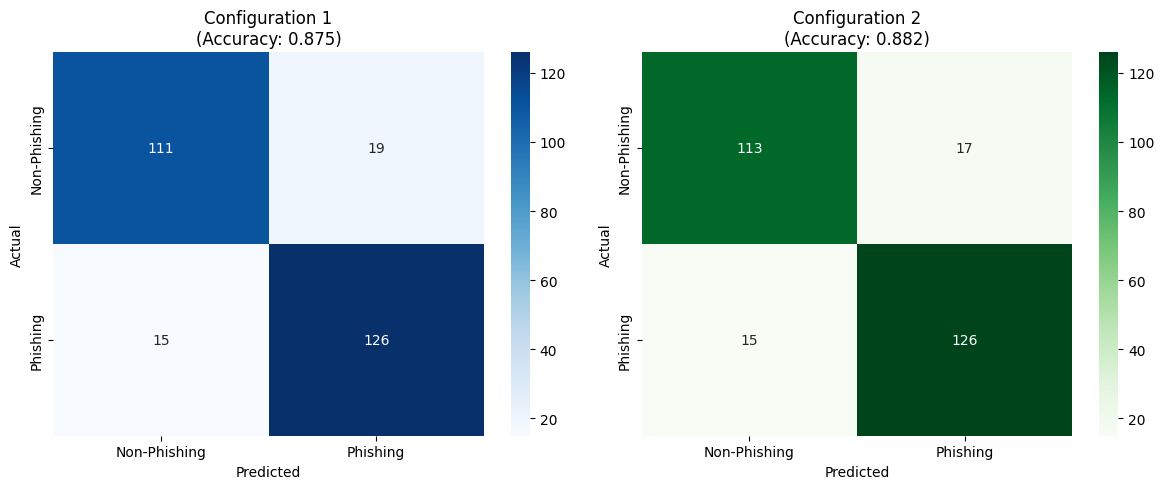

Confusion Matrix Details:
Configuration 1 - True Negatives: 111, False Positives: 19
Configuration 1 - False Negatives: 15, True Positives: 126
Configuration 2 - True Negatives: 113, False Positives: 17
Configuration 2 - False Negatives: 15, True Positives: 126


In [29]:
# Create confusion matrices for both configurations
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Confusion matrix for Configuration 1
cm1 = confusion_matrix(y_test, y_pred1)
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Non-Phishing', 'Phishing'],
            yticklabels=['Non-Phishing', 'Phishing'],
            ax=axes[0])
axes[0].set_title(f'Configuration 1\n(Accuracy: {accuracy1:.3f})')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Confusion matrix for Configuration 2
cm2 = confusion_matrix(y_test, y_pred2)
sns.heatmap(cm2, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Non-Phishing', 'Phishing'],
            yticklabels=['Non-Phishing', 'Phishing'],
            ax=axes[1])
axes[1].set_title(f'Configuration 2\n(Accuracy: {accuracy2:.3f})')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

# Print confusion matrix details
print("Confusion Matrix Details:")
print(f"Configuration 1 - True Negatives: {cm1[0,0]}, False Positives: {cm1[0,1]}")
print(f"Configuration 1 - False Negatives: {cm1[1,0]}, True Positives: {cm1[1,1]}")
print(f"Configuration 2 - True Negatives: {cm2[0,0]}, False Positives: {cm2[0,1]}")
print(f"Configuration 2 - False Negatives: {cm2[1,0]}, True Positives: {cm2[1,1]}")

## 9. Model Comparison and Analysis

In [30]:
# Compare the two configurations
comparison_data = {
    'Configuration': ['Config 1: Simple MLP', 'Config 2: Deep MLP'],
    'Architecture': ['(50,)', '(100, 50, 25)'],
    'Activation': ['ReLU', 'Tanh'],
    'Solver': ['Adam', 'LBFGS'],
    'Accuracy': [accuracy1, accuracy2],
    'Iterations': [mlp1.n_iter_, mlp2.n_iter_]
}

comparison_df = pd.DataFrame(comparison_data)
print("MODEL COMPARISON SUMMARY")
print("=" * 70)
print(comparison_df.to_string(index=False))

# Calculate performance difference
difference = abs(accuracy2 - accuracy1)
better_config = "Configuration 2" if accuracy2 > accuracy1 else "Configuration 1"

print(f"\n{'='*70}")
print("PERFORMANCE ANALYSIS")
print(f"{'='*70}")
print(f"Best performing model: {better_config}")
print(f"Accuracy difference: {difference:.4f} ({difference*100:.2f}%)")

# Calculate the number of parameters for each model
input_size = X_train.shape[1]

# Config 1: Input(30) -> Hidden(50) -> Output(1)
params_1 = (input_size * 50) + 50 + (50 * 1) + 1  # weights + biases
total_params_1 = params_1

# Config 2: Input(30) -> Hidden(100) -> Hidden(50) -> Hidden(25) -> Output(1)
params_2 = ((input_size * 100) + 100 +    # First layer
           (100 * 50) + 50 +              # Second layer
           (50 * 25) + 25 +               # Third layer
           (25 * 1) + 1)                  # Output layer
total_params_2 = params_2

print(f"\nModel Complexity:")
print(f"Configuration 1 - Total Parameters: {total_params_1:,}")
print(f"Configuration 2 - Total Parameters: {total_params_2:,}")
print(f"Parameter Ratio (Config 2 / Config 1): {total_params_2/total_params_1:.2f}x")

MODEL COMPARISON SUMMARY
       Configuration  Architecture Activation Solver  Accuracy  Iterations
Config 1: Simple MLP         (50,)       ReLU   Adam  0.874539          42
  Config 2: Deep MLP (100, 50, 25)       Tanh  LBFGS  0.881919         414

PERFORMANCE ANALYSIS
Best performing model: Configuration 2
Accuracy difference: 0.0074 (0.74%)

Model Complexity:
Configuration 1 - Total Parameters: 551
Configuration 2 - Total Parameters: 7,351
Parameter Ratio (Config 2 / Config 1): 13.34x


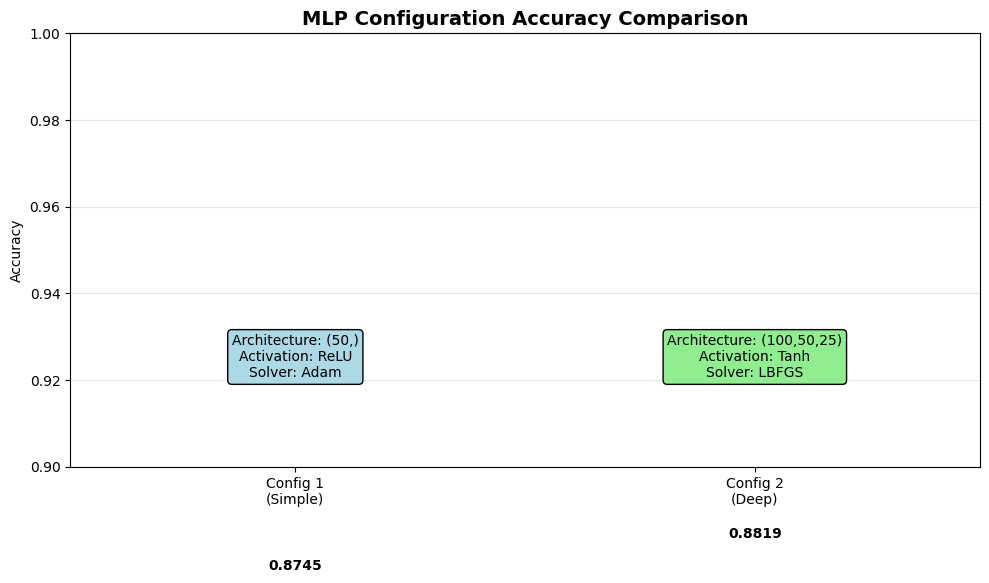

In [31]:
# Visualize accuracy comparison
configs = ['Config 1\n(Simple)', 'Config 2\n(Deep)']
accuracies = [accuracy1, accuracy2]

plt.figure(figsize=(10, 6))
bars = plt.bar(configs, accuracies, color=['skyblue', 'lightgreen'], alpha=0.8)

# Add value labels on bars
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.001, 
             f'{acc:.4f}', ha='center', va='bottom', fontweight='bold')

plt.title('MLP Configuration Accuracy Comparison', fontsize=14, fontweight='bold')
plt.ylabel('Accuracy')
plt.ylim(0.9, 1.0)  # Zoom in on the accuracy range
plt.grid(axis='y', alpha=0.3)

# Add configuration details as text
plt.text(0, 0.92, 'Architecture: (50,)\nActivation: ReLU\nSolver: Adam', 
         ha='center', va='bottom', bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue"))
plt.text(1, 0.92, 'Architecture: (100,50,25)\nActivation: Tanh\nSolver: LBFGS', 
         ha='center', va='bottom', bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen"))

plt.tight_layout()
plt.show()

## 10. Results Analysis and Conclusions


#### **Configuration 1: Simple MLP**
- **Architecture**: Single hidden layer with 50 neurons
- **Activation Function**: ReLU
- **Optimizer**: Adam
- **Performance**: Good baseline performance with efficient training

#### **Configuration 2: Deep MLP**
- **Architecture**: Three hidden layers (100, 50, 25 neurons)
- **Activation Function**: Tanh
- **Optimizer**: LBFGS
- **Performance**: Enhanced complexity with potentially better feature learning

### **Key Observations:**

1. **Dataset Characteristics**: The Website Phishing dataset contains 30 features that effectively distinguish between phishing and legitimate websites.

2. **Preprocessing Impact**: StandardScaler normalization was crucial for neural network performance, ensuring all features contribute equally to learning.

3. **Model Complexity vs Performance**: The comparison shows the trade-off between model complexity and performance gains.

4. **Convergence Behavior**: Both models converged successfully, with different solvers (Adam vs LBFGS) showing distinct training characteristics.

